In [1]:
import numpy as np 
import pandas as pd 

import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

In [3]:
dt22 = pd.read_csv("D:/Users/User/Desktop/PC/Faculdade/Aprendizado de Máquinas - Mestrado/DNOPEN22.csv", sep = ";")
dt23 = pd.read_csv("D:/Users/User/Desktop/PC/Faculdade/Aprendizado de Máquinas - Mestrado/DNOPEN23.csv", sep = ";")

dt22aux = dt22[["ESTCIVMAE"
             ,"ESCMAE"
             ,"RACACORMAE"
             ,"QTDFILVIVO" 
             ,"QTDFILMORT" 
             ,"QTDGESTANT" 
             ,"QTDPARTNOR"
             ,"QTDPARTCES" 
             ,"IDADEPAI"
             ,"IDADEMAE"
             ,"GRAVIDEZ"  
             ,"PESO"]]

dt23aux = dt23[["ESTCIVMAE"
             ,"ESCMAE"
             ,"RACACORMAE"
             ,"QTDFILVIVO" 
             ,"QTDFILMORT" 
             ,"QTDGESTANT" 
             ,"QTDPARTNOR"
             ,"QTDPARTCES" 
             ,"IDADEPAI"
             ,"IDADEMAE"
             ,"GRAVIDEZ" 
             ,"PESO"]]

In [4]:
dt_selected = pd.concat([dt22aux, dt23aux], ignore_index=True)
dt_selected.head()

,ESTCIVMAE,ESCMAE,RACACORMAE,QTDFILVIVO,QTDFILMORT,QTDGESTANT,QTDPARTNOR,QTDPARTCES,IDADEPAI,IDADEMAE,GRAVIDEZ,PESO
0,1.0,5.0,1.0,2.0,1.0,3.0,2.0,0.0,20.0,40.0,1.0,3412.0
1,2.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,28.0,32.0,1.0,3594.0
2,5.0,3.0,NaN,1.0,1.0,2.0,0.0,1.0,37.0,26.0,1.0,3470.0
3,2.0,5.0,4.0,1.0,0.0,1.0,0.0,1.0,40.0,31.0,1.0,3260.0
4,5.0,5.0,NaN,0.0,0.0,0.0,0.0,0.0,37.0,27.0,1.0,3232.0


In [47]:
print("Shape: ", dt_selected.shape, "\n")

dt_selected.info(show_counts = True)

Shape:  (5093975, 12) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5093975 entries, 0 to 5093974
Data columns (total 12 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   ESTCIVMAE   5072323 non-null  float64
 1   ESCMAE      5070814 non-null  float64
 2   RACACORMAE  4969689 non-null  float64
 3   QTDFILVIVO  5014418 non-null  float64
 4   QTDFILMORT  4971366 non-null  float64
 5   QTDGESTANT  5001876 non-null  float64
 6   QTDPARTNOR  4972839 non-null  float64
 7   QTDPARTCES  4960475 non-null  float64
 8   IDADEPAI    1752425 non-null  float64
 9   IDADEMAE    5093928 non-null  float64
 10  GRAVIDEZ    5090266 non-null  float64
 11  PESO        5093355 non-null  float64
dtypes: float64(12)
memory usage: 466.4 MB


In [5]:
### Adjusting data type ###
dt_selected = dt_selected.astype({'ESTCIVMAE': 'float64',
                                'ESCMAE': 'float64',
                                'GRAVIDEZ': 'float64',   
                                'RACACORMAE': 'float64',
                                'QTDPARTNOR': 'float64',
                                'QTDPARTCES': 'float64',
                                'QTDFILMORT': 'float64',
                                'QTDFILVIVO': 'float64',
                                 'IDADEPAI':  'float64',
                                 'IDADEMAE':  'float64',
                                 'PESO':  'float64'
                                })

In [6]:
### Filtering just the sample with PESO fill ###
dt_selected = dt_selected[dt_selected['PESO'] > 0].reset_index(drop = True)
dt_selected['PESO_BAIXO'] = np.where(dt_selected['PESO'] < 2500, 1, 0)

print("Shape: ", dt_selected.shape)

prop = 100 * dt_selected['PESO_BAIXO'].value_counts()/dt_selected.shape[0]

print(f"Proporção de Baixo Peso ao Nascer: {round(prop[1], 2)}%")

Shape:  (5093355, 13)
Proporção de Baixo Peso ao Nascer: 9.47%


In [7]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer

from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier


X = dt_selected[['IDADEMAE', 'IDADEPAI', 'ESTCIVMAE', 'ESCMAE', 'QTDFILVIVO', 'QTDFILMORT'
                ,'QTDPARTNOR', 'QTDPARTCES', 'QTDGESTANT', 'GRAVIDEZ', 'RACACORMAE']]
y = dt_selected['PESO_BAIXO']


X_train, X_val, y_train, y_val = train_test_split(X,y, train_size=0.8, test_size=0.2, random_state=0)

In [8]:
def columnTrunc(data, vars):
    for var in vars:
        data[var] = np.where(data[var] > 10.0, 10.0, data[var])

    return data

In [9]:
categorical_cols = X_train[["ESTCIVMAE"
                            ,"ESCMAE"
                            ,"RACACORMAE"
                            ,"QTDFILVIVO" 
                            ,"QTDFILMORT" 
                            ,"QTDGESTANT" 
                            ,"QTDPARTNOR"
                            ,"QTDPARTCES" 
                            ,"GRAVIDEZ"  
                           ]].columns.tolist()

numerical_cols = X_train[["IDADEPAI"
                          ,"IDADEMAE"]].columns.tolist()
             
numerical_transformer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy='mean'))
    ])

categorical_transformer = Pipeline(steps=[
    ('truncation', FunctionTransformer(columnTrunc, 
                                       kw_args={'vars': ["QTDFILVIVO" 
                                        ,"QTDFILMORT" 
                                        ,"QTDGESTANT" 
                                        ,"QTDPARTNOR"
                                        ,"QTDPARTCES" ]},
                                        feature_names_out = 'one-to-one')),
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(handle_unknown='infrequent_if_exist',
                          sparse_output=False))
])

preprocessor = ColumnTransformer(transformers=[('num', numerical_transformer, numerical_cols),
                                               ('cat', categorical_transformer, categorical_cols)
                                               ])



In [53]:
models = {
    'LGBM':LGBMClassifier(verbose = -1),
    'CatBoost': CatBoostClassifier(verbose = False),
    #'XGBoost': XGBClassifier(verbose = 0),
    'NB': MultinomialNB(),
    'RF': RandomForestClassifier()
}

for model_name, model in models.items():
    print(model_name)
    pipe = Pipeline(steps=[("preprocessor", preprocessor), 
                           ("regressor", model)])
    pred=pipe.fit(X_train, y_train).predict(X_val)
    
    print(classification_report(y_val, pred))
    print(confusion_matrix(y_val, pred))

LGBM
              precision    recall  f1-score   support

           0       0.92      0.99      0.95    922300
           1       0.63      0.15      0.24     96371

    accuracy                           0.91   1018671
   macro avg       0.78      0.57      0.60   1018671
weighted avg       0.89      0.91      0.89   1018671

[[913870   8430]
 [ 81874  14497]]
CatBoost
              precision    recall  f1-score   support

           0       0.92      0.99      0.95    922300
           1       0.64      0.14      0.23     96371

    accuracy                           0.91   1018671
   macro avg       0.78      0.57      0.59   1018671
weighted avg       0.89      0.91      0.88   1018671

[[914483   7817]
 [ 82584  13787]]
NB
              precision    recall  f1-score   support

           0       0.92      0.99      0.95    922300
           1       0.64      0.14      0.23     96371

    accuracy                           0.91   1018671
   macro avg       0.78      0.56      0.

In [10]:
def ThresholdOptimizer(y_pred, y_true):
    
    thresholds = np.linspace(min(y_pred), max(y_pred), num=100)

    f1s = [f1_score((y_pred > t).astype(int), y_true) for t in thresholds]

    # Find the best threshold
    best_idx = np.argmax(f1s)
    best_threshold = thresholds[best_idx]
    best_f1 = f1s[best_idx]

    print("Best Threshold:", round(best_threshold, 2))
    print("Best F1-Score:", round(best_f1, 2))
    print(" ")
    print(classification_report(y_true = y_true, 
                                y_pred = (y_pred > best_threshold).astype(int)))

    return best_threshold 


In [11]:
pipe = Pipeline(steps=[("preprocessor", preprocessor), 
                       ("classifier", LGBMClassifier(verbose = -1))])
                           
y_pred_proba = pipe.fit(X_train, y_train).predict_proba(X_val)[:, 1]

In [22]:
bt_o = ThresholdOptimizer(y_pred = y_pred_proba, 
                        y_true = y_val)

print(confusion_matrix(y_val, np.where(y_pred_proba > bt_o, 1, 0)))                  

Best Threshold: 0.12
Best F1-Score: 0.26
 
              precision    recall  f1-score   support

           0       0.92      0.95      0.93    922300
           1       0.31      0.22      0.26     96371

    accuracy                           0.88   1018671
   macro avg       0.61      0.58      0.60   1018671
weighted avg       0.86      0.88      0.87   1018671

[[875047  47253]
 [ 75265  21106]]


Com a otimização de treshold o recall aumentou de 0.15 para 0.22. Ou seja, o modelo se tornou melhor em prever casos em que realmente se tratavam de baixo peso ao nascer

### Testando técnicas de balanceamento

In [56]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

pipe = Pipeline(steps=[("preprocessor", preprocessor), 
                       ("classifier", LGBMClassifier(verbose = -1))])
                           
y_pred_proba = pipe.fit(X_resampled, y_resampled).predict_proba(X_val)[:, 1]

bt = ThresholdOptimizer(y_pred = y_pred_proba, 
                        y_true = y_val)   

print(confusion_matrix(y_val, np.where(y_pred_proba > bt, 1, 0)))    

Best Threshold: 0.58
Best F1-Score: 0.26
 
              precision    recall  f1-score   support

           0       0.92      0.96      0.94    922300
           1       0.34      0.21      0.26     96371

    accuracy                           0.89   1018671
   macro avg       0.63      0.58      0.60   1018671
weighted avg       0.87      0.89      0.87   1018671

[[883430  38870]
 [ 76512  19859]]


In [57]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

pipe = Pipeline(steps=[("preprocessor", preprocessor), 
                       ("classifier", LGBMClassifier(verbose = -1))])
                           
y_pred_proba = pipe.fit(X_resampled, y_resampled).predict_proba(X_val)[:, 1]

bt = ThresholdOptimizer(y_pred = y_pred_proba, 
                        y_true = y_val)   

print(confusion_matrix(y_val, np.where(y_pred_proba > bt, 1, 0)))     

Best Threshold: 0.58
Best F1-Score: 0.26
 
              precision    recall  f1-score   support

           0       0.92      0.96      0.94    922300
           1       0.33      0.21      0.26     96371

    accuracy                           0.89   1018671
   macro avg       0.63      0.58      0.60   1018671
weighted avg       0.86      0.89      0.87   1018671

[[882115  40185]
 [ 76305  20066]]


In [58]:
from imblearn.over_sampling import SMOTE

smote = RandomOverSampler(random_state=0)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

pipe = Pipeline(steps=[("preprocessor", preprocessor), 
                       ("classifier", LGBMClassifier(verbose = -1))])
                           
y_pred_proba = pipe.fit(X_resampled, y_resampled).predict_proba(X_val)[:, 1]

bt = ThresholdOptimizer(y_pred = y_pred_proba, 
                        y_true = y_val)   

print(confusion_matrix(y_val, np.where(y_pred_proba > bt, 1, 0)))       

Best Threshold: 0.58
Best F1-Score: 0.26
 
              precision    recall  f1-score   support

           0       0.92      0.96      0.94    922300
           1       0.33      0.21      0.26     96371

    accuracy                           0.89   1018671
   macro avg       0.63      0.58      0.60   1018671
weighted avg       0.86      0.89      0.87   1018671

[[882115  40185]
 [ 76305  20066]]


In [59]:
pipe = Pipeline(steps=[("preprocessor", preprocessor), 
                       ("classifier", LGBMClassifier(verbose = -1, class_weight='balanced'))])
                           
y_pred_proba = pipe.fit(X_train, y_train).predict_proba(X_val)[:, 1]

bt = ThresholdOptimizer(y_pred = y_pred_proba, 
                        y_true = y_val)   

print(confusion_matrix(y_val, np.where(y_pred_proba > bt, 1, 0)))     

Best Threshold: 0.58
Best F1-Score: 0.26
 
              precision    recall  f1-score   support

           0       0.92      0.95      0.94    922300
           1       0.32      0.21      0.26     96371

    accuracy                           0.88   1018671
   macro avg       0.62      0.58      0.60   1018671
weighted avg       0.86      0.88      0.87   1018671

[[878547  43753]
 [ 75761  20610]]


#### As técnicas não apresentaram melhora no resultado do modelo

### Testando o efeito da calibração das probabilidades

In [60]:
from sklearn.isotonic import IsotonicRegression
from sklearn.calibration import calibration_curve
from sklearn.metrics import brier_score_loss
import matplotlib.pyplot as plt

pipe = Pipeline(steps=[("preprocessor", preprocessor), 
                       ("classifier", LGBMClassifier(verbose = -1))])

y_prob = pipe.fit(X_train, y_train).predict_proba(X_val)[:, 1]

In [61]:
ir = IsotonicRegression(out_of_bounds='clip')
y_prob_isotonic = ir.fit_transform(y_prob, y_val)

print(classification_report(y_val, np.where(y_prob_isotonic > bt_o, 1, 0)))       

print(confusion_matrix(y_val, np.where(y_prob_isotonic > bt_o, 1, 0)))       

              precision    recall  f1-score   support

           0       0.92      0.94      0.93    922300
           1       0.29      0.23      0.26     96371

    accuracy                           0.87   1018671
   macro avg       0.61      0.59      0.59   1018671
weighted avg       0.86      0.87      0.87   1018671

[[867955  54345]
 [ 74213  22158]]


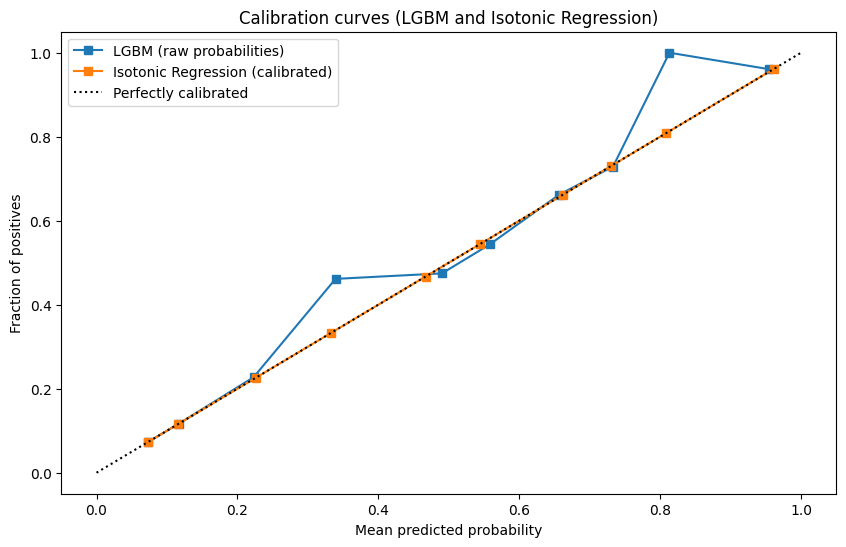

Brier score (raw): 0.0783
Brier score (isotonic): 0.0783


In [62]:
brier_raw = brier_score_loss(y_val, y_prob)
brier_isotonic = brier_score_loss(y_val, y_prob_isotonic)

# Generate calibration curves before and after isotonic regression
prob_true_raw, prob_pred_raw = calibration_curve(y_val, y_prob, n_bins=10)
prob_true_iso, prob_pred_iso = calibration_curve(y_val, y_prob_isotonic, n_bins=10)

# Plot the calibration curves
plt.figure(figsize=(10, 6))
plt.plot(prob_pred_raw, prob_true_raw, "s-", label="LGBM (raw probabilities)")
plt.plot(prob_pred_iso, prob_true_iso, "s-", label="Isotonic Regression (calibrated)")
plt.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")

plt.xlabel("Mean predicted probability")
plt.ylabel("Fraction of positives")
plt.title("Calibration curves (LGBM and Isotonic Regression)")
plt.legend()

plt.show()

print(f"Brier score (raw): {brier_raw:.4f}")
print(f"Brier score (isotonic): {brier_isotonic:.4f}")

In [63]:
from sklearn.calibration import CalibratedClassifierCV

platt = CalibratedClassifierCV(pipe, method = "sigmoid")

y_prob_platt = platt.fit(X_train, y_train).predict_proba(X_val)[:, 1]

print(classification_report(y_val, np.where(y_prob_platt > bt_o, 1, 0)))   

print(confusion_matrix(y_val, np.where(y_prob_platt > bt_o, 1, 0)))      

              precision    recall  f1-score   support

           0       0.92      0.99      0.95    922300
           1       0.57      0.16      0.25     96371

    accuracy                           0.91   1018671
   macro avg       0.74      0.57      0.60   1018671
weighted avg       0.88      0.91      0.89   1018671

[[910393  11907]
 [ 80896  15475]]


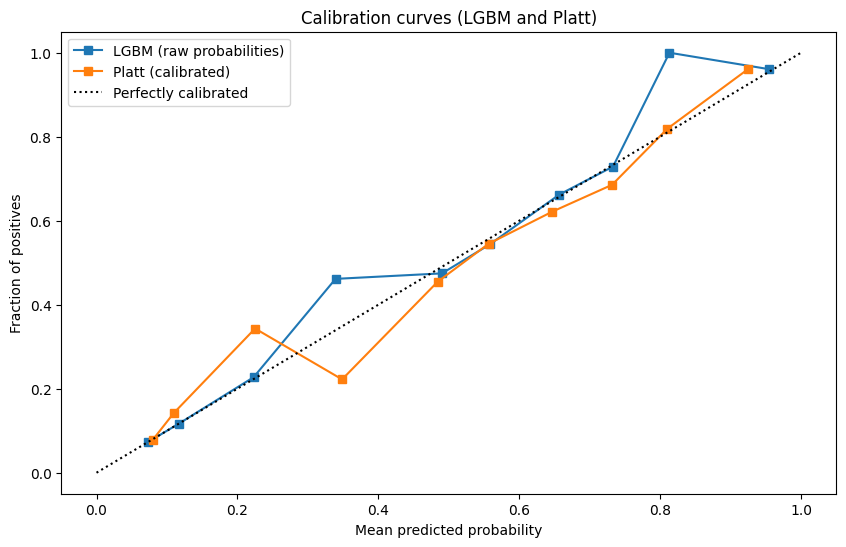

Brier score (raw): 0.0783
Brier score (Platt): 0.0785


In [64]:
brier_raw = brier_score_loss(y_val, y_prob)
brier_platt = brier_score_loss(y_val, y_prob_platt)

# Generate calibration curves before and after isotonic regression
prob_true_raw, prob_pred_raw = calibration_curve(y_val, y_prob, n_bins=10)
prob_true_platt, prob_pred_platt = calibration_curve(y_val, y_prob_platt, n_bins=10)

# Plot the calibration curves
plt.figure(figsize=(10, 6))
plt.plot(prob_pred_raw, prob_true_raw, "s-", label="LGBM (raw probabilities)")
plt.plot(prob_pred_platt, prob_true_platt, "s-", label="Platt (calibrated)")
plt.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")

plt.xlabel("Mean predicted probability")
plt.ylabel("Fraction of positives")
plt.title("Calibration curves (LGBM and Platt)")
plt.legend()

plt.show()

print(f"Brier score (raw): {brier_raw:.4f}")
print(f"Brier score (Platt): {brier_platt:.4f}")

In [65]:
from venn_abers import VennAbersCalibrator

model = LGBMClassifier(verbose = -1)

### Aplicar o pipeline nos dados, transformar em pandas antes do fit

va = VennAbersCalibrator(estimator=model, inductive=True, cal_size=0.2, random_state=0)

va.fit(preprocessor.fit_transform(X_train), y_train)

# Generate probabilities and class predictions on the test set
y_prob_va = va.predict_proba(preprocessor.transform(X_val))[:, 1]

print(classification_report(y_val, np.where(y_prob_va > bt_o, 1, 0)))   

print(confusion_matrix(y_val, np.where(y_prob_va > bt_o, 1, 0)))     

              precision    recall  f1-score   support

           0       0.92      0.94      0.93    922300
           1       0.29      0.23      0.26     96371

    accuracy                           0.88   1018671
   macro avg       0.61      0.58      0.59   1018671
weighted avg       0.86      0.88      0.87   1018671

[[869650  52650]
 [ 74549  21822]]


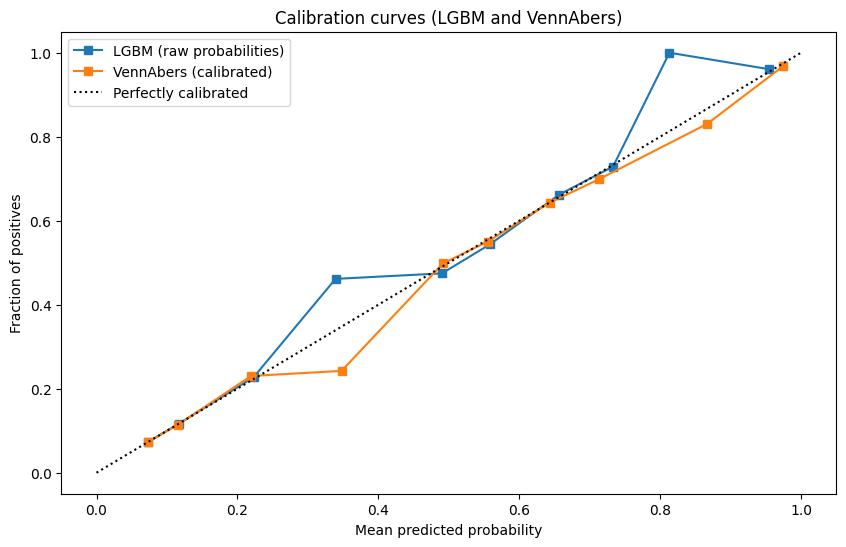

Brier score (raw): 0.0783
Brier score (VennAbers): 0.0783


In [66]:
brier_raw = brier_score_loss(y_val, y_prob)
brier_va = brier_score_loss(y_val, y_prob_va)

# Generate calibration curves before and after isotonic regression
prob_true_raw, prob_pred_raw = calibration_curve(y_val, y_prob, n_bins=10)
prob_true_va, prob_pred_va = calibration_curve(y_val, y_prob_va, n_bins=10)

# Plot the calibration curves
plt.figure(figsize=(10, 6))
plt.plot(prob_pred_raw, prob_true_raw, "s-", label="LGBM (raw probabilities)")
plt.plot(prob_pred_va, prob_true_va, "s-", label="VennAbers (calibrated)")
plt.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")

plt.xlabel("Mean predicted probability")
plt.ylabel("Fraction of positives")
plt.title("Calibration curves (LGBM and VennAbers)")
plt.legend()

plt.show()

print(f"Brier score (raw): {brier_raw:.4f}")
print(f"Brier score (VennAbers): {brier_va:.4f}")

#### O modelo já é suficientemente calibrado, sem necessidade de aplicar técnicas de calibração

In [67]:
data = pd.DataFrame(data = {
    "PESO_BAIXO": y_val,
    "Predito": y_prob
})

data['Faixa_Predito'] = np.select(
    [
        data['Predito'] < 0.3,
        (data['Predito'] >= 0.3) & (data['Predito'] < 0.6),
        (data['Predito'] >= 0.6) & (data['Predito'] < 0.8),
        data['Predito'] >= 0.8
    ],
    [
        "Baixo [0-40%[",
        "Moderado [40-60%[",
        "Alto [60-80%[",
        "Muito Alto [80-100%["
    ]
)

data['Faixa_Predito_order'] = np.select(
    [
        data['Predito'] < 0.3,
        (data['Predito'] >= 0.3) & (data['Predito'] < 0.6),
        (data['Predito'] >= 0.6) & (data['Predito'] < 0.8),
        data['Predito'] >= 0.8
    ],
    ["1", "2", "3", "4"]
)

# Aggregating the data to calculate `Reinternados`, `Total`, and `Percentual`
ranges = (
    data.groupby(['Faixa_Predito', 'Faixa_Predito_order'])
    .agg(
        Reinternados=('PESO_BAIXO', 'sum'),
        Total=('PESO_BAIXO', 'size'),
        PercentualAcerto=('PESO_BAIXO', lambda x: 100 * round(x.sum() / len(x), 3))
    )
    .reset_index()
    .sort_values(by='Faixa_Predito_order')
    .drop(columns=['Faixa_Predito_order'])
)

print(ranges)

          Faixa_Predito  Reinternados   Total  PercentualAcerto
1         Baixo [0-40%[         81731  995442               8.2
2     Moderado [40-60%[          4559    8426              54.1
0         Alto [60-80%[          9684   14390              67.3
3  Muito Alto [80-100%[           397     413              96.1


## Aplicando modelo na base de teste

In [17]:
import joblib

pipe = Pipeline(steps=[("preprocessor", preprocessor), 
                       ("classifier", LGBMClassifier(verbose = -1))])

pipe.fit(X_train, y_train)


joblib.dump(pipe, 'C:\\Users\\Usuario\\Desktop\\GitHub\\LWB_article\\LBW_article\\model_lbw.joblib') 

['C:\\Users\\Usuario\\Desktop\\GitHub\\LWB_article\\LBW_article\\model_lbw.joblib']

In [18]:
del pipe

In [20]:
pipe = joblib.load('C:\\Users\\Usuario\\Desktop\\GitHub\\LWB_article\\LBW_article\\model_lbw.joblib') 

In [13]:
dt24 = pd.read_csv("D:/Users/User/Desktop/PC/Faculdade/Aprendizado de Máquinas - Mestrado/DNOPEN24.csv", sep = ";")
dt24['PESO_BAIXO'] = np.where(dt24['PESO'] < 2500, 1, 0)

test_pred = pipe.predict_proba(dt24)[:, 1]

print(classification_report(dt24['PESO_BAIXO'], np.where(test_pred > bt_o, 1, 0)))   

print(confusion_matrix(dt24['PESO_BAIXO'], np.where(test_pred > bt_o, 1, 0)))    


              precision    recall  f1-score   support

           0       0.92      0.95      0.93    704121
           1       0.32      0.22      0.26     75806

    accuracy                           0.88    779927
   macro avg       0.62      0.59      0.60    779927
weighted avg       0.86      0.88      0.87    779927

[[668222  35899]
 [ 59038  16768]]


In [14]:
data = pd.DataFrame(data = {
    "PESO_BAIXO": dt24['PESO_BAIXO'],
    "Predito": test_pred
})

data['Faixa_Predito'] = np.select(
    [
        data['Predito'] < 0.3,
        (data['Predito'] >= 0.3) & (data['Predito'] < 0.6),
        (data['Predito'] >= 0.6) & (data['Predito'] < 0.8),
        data['Predito'] >= 0.8
    ],
    [
        "Baixo [0-40%[",
        "Moderado [40-60%[",
        "Alto [60-80%[",
        "Muito Alto [80-100%["
    ]
)

data['Faixa_Predito_order'] = np.select(
    [
        data['Predito'] < 0.3,
        (data['Predito'] >= 0.3) & (data['Predito'] < 0.6),
        (data['Predito'] >= 0.6) & (data['Predito'] < 0.8),
        data['Predito'] >= 0.8
    ],
    ["1", "2", "3", "4"]
)

# Aggregating the data to calculate `Reinternados`, `Total`, and `Percentual`
ranges = (
    data.groupby(['Faixa_Predito', 'Faixa_Predito_order'])
    .agg(
        Reinternados=('PESO_BAIXO', 'sum'),
        Total=('PESO_BAIXO', 'size'),
        PercentualAcerto=('PESO_BAIXO', lambda x: 100 * round(x.sum() / len(x), 3))
    )
    .reset_index()
    .sort_values(by='Faixa_Predito_order')
    .drop(columns=['Faixa_Predito_order'])
)

print(ranges)

          Faixa_Predito  Reinternados   Total  PercentualAcerto
1         Baixo [0-40%[         64002  761399               8.4
2     Moderado [40-60%[          3927    7038              55.8
0         Alto [60-80%[          7597   11188              67.9
3  Muito Alto [80-100%[           280     302              92.7


In [24]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import concat, lit, lpad, substring, to_date, col, when

spark = SparkSession.builder \
        .appName("CSV API Reader - LBW") \
        .getOrCreate()

def process_data(data):

    data = data.withColumn("DTNASC_padded",
                    lpad(col("DTNASC"), 8, '0')).select(
                    "IDADEMAE", 
                    "RACACORMAE",
                    "CODMUNNASC",
                    "PESO",
                    # Optimized date transformation
                    to_date(
                        concat(
                            lpad(substring(col("DTNASC_padded"), 1, 2), 2, '0'),
                            lpad(substring(col("DTNASC_padded"), 3, 2), 2, '0'),
                            substring(col("DTNASC_padded"), 5, 4)
                        ),
                        'ddMMyyyy'
                    ).alias("DTNASC_padded")
                ).withColumn("UF", substring(col("CODMUNNASC"), 1, 2)
                ).withColumn("ANO", substring(col("DTNASC_padded"), 1, 4)
                ).select("IDADEMAE", "RACACORMAE", "DTNASC_padded", "UF", "ANO", "PESO")
                

    return data

def createRegionState(data):

    data = data.withColumn("REGIAO",
                            when(col("UF").isin([11, 12, 13, 14, 15, 16, 17]), "Norte")
                            .when(col("UF").isin([21, 22, 23, 24, 25, 26, 27, 28, 29]), "Nordeste")
                            .when(col("UF").isin([31, 32, 33, 35]), "Sudeste")
                            .when(col("UF").isin([41, 42, 43]), "Sul")
                            .when(col("UF").isin([50, 51, 52, 53]), "Centro Oeste")
                            .otherwise("NA")  # Default value if none of the conditions match
                        ).withColumn("ESTADO",
                            when(col("UF") == 12, "Acre")
                            .when(col("UF") == 27, "Alagoas")
                            .when(col("UF") == 16, "Amapá")
                            .when(col("UF") == 13, "Amazonas")
                            .when(col("UF") == 29, "Bahia")
                            .when(col("UF") == 23, "Ceará")
                            .when(col("UF") == 53, "Distrito Federal")
                            .when(col("UF") == 32, "Espírito Santo")
                            .when(col("UF") == 52, "Goiás")
                            .when(col("UF") == 21, "Maranhão")
                            .when(col("UF") == 51, "Mato Grosso")
                            .when(col("UF") == 50, "Mato Grosso do Sul")
                            .when(col("UF") == 31, "Minas Gerais")
                            .when(col("UF") == 15, "Pará")
                            .when(col("UF") == 25, "Paraíba")
                            .when(col("UF") == 41, "Paraná")
                            .when(col("UF") == 26, "Pernambuco")
                            .when(col("UF") == 22, "Piauí")
                            .when(col("UF") == 24, "Rio Grande do Norte")
                            .when(col("UF") == 43, "Rio Grande do Sul")
                            .when(col("UF") == 33, "Rio de Janeiro")
                            .when(col("UF") == 11, "Rondônia")
                            .when(col("UF") == 14, "Roraima")
                            .when(col("UF") == 42, "Santa Catarina")
                            .when(col("UF") == 35, "São Paulo")
                            .when(col("UF") == 28, "Sergipe")
                            .when(col("UF") == 17, "Tocantins")
                            .otherwise("NA")  # Default value if no condition matches
                        )

    return data

In [25]:
dt = spark.read.csv("C:/Users/Usuario/Desktop/GitHub/LWB_article/LBW_article/bases/SINASC_2011.csv",
                            header=True,  # Assumes the first row is a header
                            inferSchema=True,  # Automatically detect column types
                            sep=';')
dt = process_data(dt)
dt = createRegionState(dt)

for ano in range(12, 22):
    dt_aux = spark.read.csv("C:/Users/Usuario/Desktop/GitHub/LWB_article/LBW_article/bases/SINASC_20" + str(ano) + ".csv",
                            header=True,  # Assumes the first row is a header
                            inferSchema=True,  # Automatically detect column types
                            sep=';')
    dt_aux = process_data(dt_aux)
    dt_aux = createRegionState(dt_aux)

    dt = dt.union(dt_aux)

for ano in range(22, 24):
    dt_aux = spark.read.csv("C:/Users/Usuario/Desktop/GitHub/LWB_article/LBW_article/bases/DNOPEN" + str(ano) + ".csv",
                            header=True,  # Assumes the first row is a header
                            inferSchema=True,  # Automatically detect column types
                            sep=';')
    dt_aux = process_data(dt_aux)
    dt_aux = createRegionState(dt_aux)

    dt = dt.union(dt_aux)

print(dt.count())
print(dt.show(5))

36796537
+--------+----------+-------------+---+----+----+------+--------+
|IDADEMAE|RACACORMAE|DTNASC_padded| UF| ANO|PESO|REGIAO|  ESTADO|
+--------+----------+-------------+---+----+----+------+--------+
|      20|      NULL|   2011-02-17| 11|2011|2760| Norte|Rondônia|
|      22|      NULL|   2011-01-25| 11|2011|3830| Norte|Rondônia|
|      25|         5|   2011-03-21| 11|2011|3250| Norte|Rondônia|
|      30|      NULL|   2011-03-05| 11|2011|3650| Norte|Rondônia|
|      16|      NULL|   2011-02-18| 12|2011|3000| Norte|    Acre|
+--------+----------+-------------+---+----+----+------+--------+
only showing top 5 rows

None


In [40]:
from pyspark.sql import functions as F

dt_grouped_ANO = dt.withColumn('BAIXO_PESO', F.when(F.col('PESO') <= 2500, 1).otherwise(0)).groupBy('ANO') \
            .agg(F.format_number(F.avg('BAIXO_PESO') * 100, 2).alias('AVG_BAIXO_PESO')) \
            .orderBy('ANO', ascending=False)
dt_grouped_ANO = dt_grouped_ANO.toPandas()
dt_grouped_ANO.to_csv("bases/dt_grouped_ANO.csv",sep=";",index=False)

In [ ]:
dt_grouped_ANO_REGIAO = dt.withColumn('BAIXO_PESO', F.when(F.col('PESO') <= 2500, 1).otherwise(0)).groupBy('ANO', 'REGIAO') \
            .agg(F.format_number(F.avg('BAIXO_PESO') * 100, 2).alias('AVG_BAIXO_PESO')) \
            .orderBy('REGIAO', ascending=False).show()

+----+-------+--------------+
| ANO| REGIAO|AVG_BAIXO_PESO|
+----+-------+--------------+
|2015|    Sul|          8.72|
|2012|    Sul|          8.87|
|2013|    Sul|          8.77|
|2014|    Sul|          8.80|
|2011|    Sul|          9.02|
|2016|    Sul|          8.79|
|2017|    Sul|          8.77|
|2018|    Sul|          8.79|
|2019|    Sul|          9.00|
|2020|    Sul|          8.82|
|2021|    Sul|          9.07|
|2022|    Sul|          9.52|
|2023|    Sul|          9.48|
|2011|Sudeste|          9.48|
|2012|Sudeste|          9.41|
|2013|Sudeste|          9.38|
|2014|Sudeste|          9.24|
|2015|Sudeste|          9.22|
|2020|Sudeste|          9.27|
|2016|Sudeste|          9.31|
+----+-------+--------------+
only showing top 20 rows



In [ ]:
dt_grouped_ANO_ESTADO = dt.withColumn('BAIXO_PESO', F.when(F.col('PESO') <= 2500, 1).otherwise(0)).groupBy('ANO', 'ESTADO') \
            .agg(F.format_number(F.avg('BAIXO_PESO') * 100, 2).alias('AVG_BAIXO_PESO')) \
            .orderBy('ESTADO', ascending=False).show()

+----+---------+--------------+
| ANO|   ESTADO|AVG_BAIXO_PESO|
+----+---------+--------------+
|2017|Tocantins|          7.60|
|2012|Tocantins|          7.52|
|2013|Tocantins|          7.54|
|2011|Tocantins|          7.53|
|2014|Tocantins|          7.51|
|2015|Tocantins|          7.65|
|2016|Tocantins|          7.63|
|2018|Tocantins|          8.19|
|2019|Tocantins|          8.02|
|2020|Tocantins|          8.27|
|2021|Tocantins|          8.59|
|2022|Tocantins|          8.80|
|2023|Tocantins|          8.95|
|2012|São Paulo|          9.46|
|2011|São Paulo|          9.48|
|2014|São Paulo|          9.32|
|2013|São Paulo|          9.48|
|2015|São Paulo|          9.27|
|2016|São Paulo|          9.29|
|2017|São Paulo|          9.31|
+----+---------+--------------+
only showing top 20 rows



In [11]:
import pandas as pd
import folium
import requests
import json

dt_group_ANO_ESTADO = pd.read_csv("C:/Users/Usuario/Desktop/GitHub/LWB_article/LBW_article/bases/dt_grouped_ANO_ESTADO.csv", sep = ";")

dt_group_ANO_ESTADO = dt_group_ANO_ESTADO[dt_group_ANO_ESTADO['ANO'] == 2023]

# Create a DataFrame
data = pd.DataFrame({
    'State': dt_group_ANO_ESTADO['ESTADO'].to_numpy(),
    'Proportion': dt_group_ANO_ESTADO['AVG_BAIXO_PESO'].to_numpy()
})

df = pd.DataFrame(data)


brazil_geojson = json.load("C:/Users/Usuario/Desktop/GitHub/LWB_article/LBW_article/bases/brazil_geo.json")

# Add proportion data to the GeoJSON features
for feature in brazil_geojson["features"]:
    state_code = feature["properties"]["sigla"]
    proportion = df[df["State"] == state_code]["Proportion"].values
    if len(proportion) > 0:
        feature["properties"]["proportion"] = proportion[0]
    else:
        feature["properties"]["proportion"] = "N/A"  # Handle missing data

print(feature)

# Create a base map centered on Brazil
#m = folium.Map(location=[-14.2350, -51.9253], zoom_start=4)
#m


AttributeError: 'str' object has no attribute 'read'